In [1]:
%run rs2th_cwt_functions.ipynb

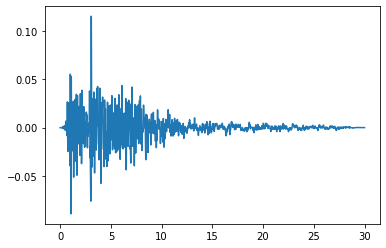

In [2]:
# Read Acc. th
data = fileI('RSN454_MORGAN_GIL067.AT2');
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005;
N = len(th);
tmax = dt*N;
time = np.arange(0,tmax,dt);
plt.plot(time,th);

In [3]:
Nt = len(th); tf = max(time); df = 1/tf;
fmax = df*Nt/2; Nf = int(Nt/2);
freq_table = np.arange(df,fmax+df,df);

In [4]:
freq,rs = srs_sw_pa(freq_table,th,dr=0.05,dt=dt);

In [5]:
# RG 1.60
ft = np.array([0.10,  2.50, 9.00, 33.0, 100.0]);  # frequency table
rt = np.array([0.07,  3.13, 2.61,  1.0,   1.0]);  # response spectrum table

In [6]:
# log-log interp
freq_spec = np.copy(freq_table);
resp_spec = 10**np.interp(np.log10(freq_spec),np.log10(ft),np.log10(rt));
resp_spec_u = resp_spec*1.3;
resp_spec_l = resp_spec/1.1;

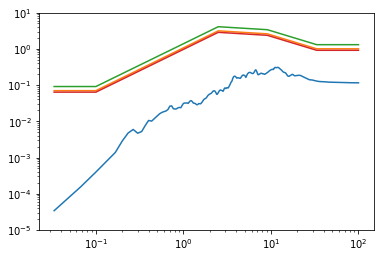

In [7]:
plt.loglog(freq,rs);
plt.loglog(freq_spec,resp_spec);
plt.loglog(freq_spec,resp_spec_u);
plt.loglog(freq_spec,resp_spec_l);
plt.ylim(1e-5,1e1);

In [8]:
zeta=0.05;
## Step 1
R = np.zeros(len(rs));
for i in range(len(rs)):
    R[i] = min(rs[i]/resp_spec_l[i],resp_spec_u[i]/rs[i]);
j_worst = np.argmin(R); f_worst = freq[j_worst]; 
resp = ((2*np.pi*f_worst)**2)*SDOF_smallwood(th,dt,f_worst,zeta,out_opt=2); tau_worst = time[np.argmax(abs(resp))];

In [9]:
## Step 2
Nf_min = 30;  # 임의 설정
B = (Nf_min-1)*df;
m = j_worst-int(Nf_min/2)
n = j_worst+int(Nf_min/2)
fm = m*df
fn = n*df

In [10]:
## Step 3
dtau = 3/(zeta*f_worst*2*np.pi);
k1 = int(((tau_worst-dtau)/tf)*(n-m));
k2 = int((tau_worst/tf)*(n-m))+1;
bw = int((n-m)/5);
m = np.arange(m,n,bw);
n = m+bw;
new_th = np.zeros(len(th),'complex');
for i in range(len(m)):
    for k in range(k1,k2):
        new_th += a(m[i],n[i],k,time,th)*w(m[i],n[i],time-k/(n[i]-m[i]))\
                  +ab(m[i],n[i],k,time,th)*wb(m[i],n[i],time-k/(n[i]-m[i]));
new_th = new_th.real

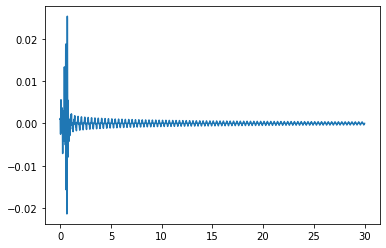

In [11]:
plt.plot(time,new_th.real);

In [12]:
## Step 4
resp1 = SDOF_smallwood(th,dt,f_worst,zeta,out_opt=2);
resp2 = SDOF_smallwood(new_th,dt,f_worst,zeta,out_opt=2);
Pl = resp1*resp2;
lmax = np.argmax(Pl);

In [13]:
## Step 5
if rs[j_worst] < resp_spec[j_worst]:
    AT = resp_spec_l[j_worst]*1.05;
else:
    AT = resp_spec_u[j_worst]*0.95;
D = AT*(1/f_worst)**2;
alpha = (D-resp1[lmax]) / resp2[lmax];

In [14]:
th += alpha*new_th

In [93]:
m

array([ 0.        ,  5.00083347, 10.00166694, 15.00250042, 20.00333389,
       25.00416736, 30.00500083, 35.00583431, 40.00666778, 45.00750125,
       50.00833472, 55.00916819, 60.01000167, 65.01083514, 70.01166861,
       75.01250208, 80.01333556, 85.01416903, 90.0150025 , 95.01583597])

0.03333888981496916


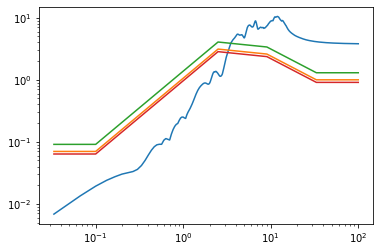

In [94]:
freq,rs = srs_sw_pa(freq_table,th,dr=0.05,dt=dt);
plt.loglog(freq,rs);
plt.loglog(freq_spec,resp_spec);
plt.loglog(freq_spec,resp_spec_u);
plt.loglog(freq_spec,resp_spec_l);
zeta=0.05;
## Step 1
R = np.zeros(len(rs));
for i in range(len(rs)):
    R[i] = min(rs[i]/resp_spec_l[i],resp_spec_u[i]/rs[i]);
j_worst = np.argmin(R); f_worst = freq[j_worst]; 
resp = ((2*np.pi*f_worst)**2)*SDOF_smallwood(th,dt,f_worst,zeta,out_opt=2); tau_worst = time[np.argmax(abs(resp))];
## Step 2
#Nf_min = 30;  # 임의 설정
#B = (Nf_min-1)*df;
#m = j_worst-int(Nf_min/2)
#n = j_worst+int(Nf_min/2)
#fm = m*df
#fn = n*df

p = 20; k2 = 100; k1 = -k2;
bw = fmax/p;
m = np.arange(0,fmax,bw)
n = m+bw;

## Step 3
dtau = 3/(zeta*f_worst*2*np.pi);
#k1 = int(((tau_worst-dtau)/tf)*(n-m));
#k2 = int((tau_worst/tf)*(n-m))+1;
k2 = 100; k1 = -k2;
new_th = np.zeros(len(th),'complex');
for i in range(len(m)):
    for k in range(k1,k2):
        new_th += a(m[i],n[i],k,time,th)*w(m[i],n[i],time-k/(n[i]-m[i]))\
                  +ab(m[i],n[i],k,time,th)*wb(m[i],n[i],time-k/(n[i]-m[i]));
new_th = new_th.real
## Step 4
resp1 = SDOF_smallwood(th,dt,f_worst,zeta,out_opt=2);
resp2 = SDOF_smallwood(new_th,dt,f_worst,zeta,out_opt=2);
Pl = resp1*resp2;
lmax = np.argmax(Pl);
## Step 5
if rs[j_worst] < resp_spec[j_worst]:
    AT = resp_spec_l[j_worst]*1.05;
else:
    AT = resp_spec_u[j_worst]*0.95;
D = AT*(1/f_worst)**2;
alpha = (D-resp1[lmax]) / resp2[lmax];

th += alpha*new_th;

#th *= np.average(resp_spec/rs);

print(f_worst)

-4.385919679174582e-13

(0.0, 2.0)

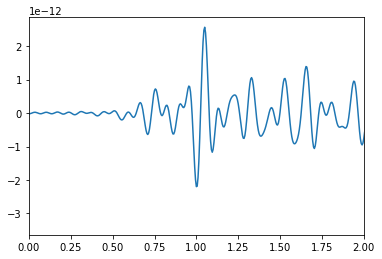

In [89]:
plt.plot(time,alpha*new_th);
plt.xlim(0,2)

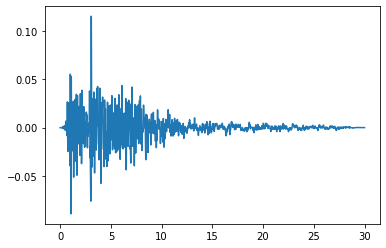

In [62]:
# Read Acc. th
data = fileI('RSN454_MORGAN_GIL067.AT2');
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005;
N = len(th);
tmax = dt*N;
time = np.arange(0,tmax,dt);
plt.plot(time,th);

In [77]:
p = 20; k2 = 100; k1 = -k2;
bw = fmax/p;
m = np.arange(0,fmax,bw)
n = m+bw;

In [78]:
new_th = np.zeros(len(th),'complex');
for i in range(len(m)):
    for k in range(k1,k2):
        new_th += a(m[i],n[i],k,time,th)*w(m[i],n[i],time-k/(n[i]-m[i]))\
                   +ab(m[i],n[i],k,time,th)*wb(m[i],n[i],time-k/(n[i]-m[i]));

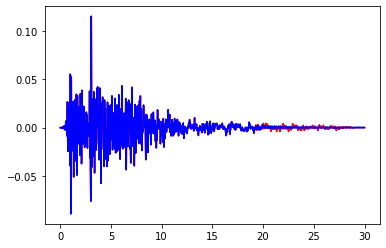

In [79]:
plt.plot(time,th,'r-');
plt.plot(time,new_th.real,'b-');